In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
%matplotlib inline
! pip install datasist
from datasist.structdata import detect_outliers
!pip install plotnine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.7 MB/s eta 0:00:00


In [2]:
exp = pd.read_csv('/content/drive/MyDrive/raw_csv.csv')

In [3]:
exp.head(2)

,id,storeId,storeName,title,rating,lunchTime,category,postCategory,sold,price,discount,shippingCost,imageUrl,storeUrl,category_name,category_id,type
0,1005002508947205,900250272,IDEACH Official Store,Wireless Handheld Vacuum Cleaner 10kPa 150W Po...,4.8,2021-04-19 00:00:00,NaN,608,1487 sold,464.16,76,0,//ae01.alicdn.com/kf/S29307438fb224285b2981d71...,//www.aliexpress.com/store/900250272,home-appliances,6,natural
1,1005004546160959,5379102,Factory Direct Collected Store,Portable Water Drop Humidifier USB Desktop Ind...,4.8,2022-07-19 00:00:00,NaN,625,5348 sold,22.28,54,0,//ae01.alicdn.com/kf/S8d4807ce10bd4152850ec872...,//www.aliexpress.com/store/5379102,home-appliances,6,natural


In [4]:
exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864270 entries, 0 to 864269
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             864270 non-null  int64  
 1   storeId        864270 non-null  int64  
 2   storeName      864270 non-null  object 
 3   title          864270 non-null  object 
 4   rating         864270 non-null  float64
 5   lunchTime      864270 non-null  object 
 6   category       0 non-null       float64
 7   postCategory   864270 non-null  int64  
 8   sold           864270 non-null  object 
 9   price          864270 non-null  float64
 10  discount       864270 non-null  int64  
 11  shippingCost   864270 non-null  object 
 12  imageUrl       864270 non-null  object 
 13  storeUrl       864270 non-null  object 
 14  category_name  864270 non-null  object 
 15  category_id    864270 non-null  int64  
 16  type           864270 non-null  object 
dtypes: float64(3), int64(5), obje

# Drop unnecessary columns and rows


In [5]:
exp = exp.drop(['storeId','storeUrl','category','type','postCategory','category_id'], axis=1)

In [6]:
exp = exp.loc[~exp['category_name'].str.contains('sexual-wellness|sex-products')]

In [7]:
exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864234 entries, 0 to 864269
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             864234 non-null  int64  
 1   storeName      864234 non-null  object 
 2   title          864234 non-null  object 
 3   rating         864234 non-null  float64
 4   lunchTime      864234 non-null  object 
 5   sold           864234 non-null  object 
 6   price          864234 non-null  float64
 7   discount       864234 non-null  int64  
 8   shippingCost   864234 non-null  object 
 9   imageUrl       864234 non-null  object 
 10  category_name  864234 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 79.1+ MB


# Creating product type column

In [8]:
groups = {
    'Home & Lifestyle': [
        'home-appliances',
        'household-appliances',
        'major-appliances',
        'home-appliance-parts',
        'kitchen-appliances',
        'home-improvement',
        'kitchen-fixtures',
        'plumbing',
        'painting-supplies-wall-treatments',
        'building-supplies',
        'bathroom-fixtures',
        'home-garden',
        'garden-supplies',
        'household-merchandises',
        'home-textile','door-intercom',
        'home-storage-organization','children-furniture','bar-furniture',
        'home-decor','kitchen-dining-bar', 'household-cleaning', 'bathroom-products',
        'caf-eacute--furniture', 'furniture-parts', 'home-furniture',
        'commercial-furniture', 'outdoor-furniture'
    ],
    'Sports & Outdoor': [
        'sports-accessories',
        'sports-bags',
        'team-sports',
        'sports-clothing',
        'swimming',
        'cycling',
        'roller-skates-skateboards-scooters',
        'bowling',
        'entertainment',
        'racquet-sports',
        'golf',
        'fitness-body-building',
        'skiing-snowboarding',
        'water-sports',
        'shooting',
        'horse-racing',
        'hunting',
        'fishing',
        'camping-hiking',
        'running',
        'sports', 'hik', 'ski', 'cycl', 'outdoor-fun-sports',
        'pools-water-fun','backpacks'
    ],
    'Electronics & Gadgets': ['hardware','electrical-equipment',
        'computer-office',
        'storage-devices',
        'laptops',
        'servers',
        'demo-board-accessories',
        'desktops',
        'tablets',
        'computer-cables-connectors',
        'office-software',
        'mini-pc',
        'computer-peripherals',
        'tablet-accessories',
        'networking',
        'computer-components',
        'device-cleaners',
        'office-electronics',
        'industrial-computer-accessories',
        'mouse-keyboards',
        'laptop-accessories',
        'laptop-parts',
        'tablet-parts',
        'consumer-electronics',
        'vr-ar-devices',
        'speakers',
        'earphones-headphones',
        '360-deg-video-cameras-accessories',
        'home-electronic-accessories',
        'power-source',
        'live-equipment',
        'hifi-devices',
        'robot',
        'wearable-devices',
        'video-games',
        'camera-photo','smart-card-system',
        'accessories-parts',
        'portable-audio-video',
        'home-audio-video',
        'electronic-cigarettes',
        'smart-electronics',
        'electronic-components-supplies',
        'electronic-data-systems',
        'electronics-stocks',
        'active-components',
        'electronics-production-machinery',
        'electronic-accessories-supplies',
        'optoelectronic-displays',
        'electronics', 'computer', 'laptop', 'pc', 'electr'
    ],
    'Outfit & Accessories': [
        'clothing',
        'shoes',
        'sneakers',
        'fragrances',
        'jewelry',
        'watches',
        'jumpsuits', 'pants', 'board-shorts', 'suits-blazers',
        'casual-shorts', 'hoodies-sweatshirts',
        'traditional-cultural-wear', 'sweaters',
        'earrings', 'necklaces-pendants', 'bracelets-bangles', 'rings',
        'coin-purses-holders', 'luggage-travel-bags', 'wallets',
        'functional-bags', 'kids-baby-bags', 'men-bags', 'women-bags',
        'women-boots', 'women-flats', 'women-pumps', 'men-boots',
        'women-hats', 'women-scarves', 'women-glasses', 'women-gloves',
        'men-glasses', 'men-gloves', 'men-scarves', 'men-hats',
        'men-ties-handkerchiefs', 'men-belts', 'men-socks',
        'women-socks-hosiery', 'women-intimates', 'men-underwear',
        'men-sleep-lounge', 'women-panties',
        'women-bracelet-watches', 'lover-watches', 'children-watches',
        'women-watches', 'men-watches', 'pocket-fob-watches','stage-dance-wear','work-wear-uniforms',
        'mother-of-the-bride-dresses', 'quinceanera-dresses',
        'homecoming-dresses', 'celebrity-inspired-dresses',
        'wedding-dresses', 'cocktail-dresses', 'prom-dresses'
    ],
    'Books & Entertainment': ['paper',
        'books',
        'e-books',
        'audiobooks',
        'movies',
        'music',
        'video-games',
        'board-games',
        'puzzles',
        'art-supplies',
        'party-supplies'
    ],
    'Health & Wellness': [
        'vitamins-supplements',
        'personal-care-products',
        'fitness-equipment',
        'health-monitors',
        'sports-nutrition',
        'relaxation-products',
        'medical-supplies',
        'alternative-medicine',
        'first-aid-kits'
    ],
    'Office & School Supplies': ['office-furniture',
        'education-office-supplies', 'presentation-supplies',
        'stationery-sticker', 'mail-shipping-supplies',
        'writing-correction-supplies', 'calendars-planners-cards',
        'labels-indexes-stamps', 'filing-products','learning-education',
        'school-educational-supplies', 'tapes-adhesives-fasteners',
        'office-binding-supplies', 'cutting-supplies'
    ],
    'Toys & Games': ['classic-toys',
        'toys-hobbies', 'stress-relief-toy', 'hobby-collectibles',
        'arts-crafts-diy-toys',
        'high-tech-toys', 'kid-party', 'building-construction-toys',
        'play-vehicles-models', 'ride-on-toys', 'action-toy-figures',
        'novelty-gag-toys', 'model-building', 'remote-control-toys',
        'diecasts-toy-vehicles', 'sports-action-video-cameras','software-games'
    ],
    'Beauty & Personal Care': ['personal-care-appliances','beauty-products',
        'grooming-products',
        'skincare',
        'makeup',
        'beauty-health', 'sanitary-paper', 'oral-hygiene', 'skin-care',
        'shaving-hair-removal', 'beauty-equipment', 'health-care',
        'bath-shower', 'hair-care-styling', 'tattoo-body-art',
        'nails-art-tools', 'men-grooming', 'skin-care-tools', 'beauty-essentials'
    ],
    'Baby & Child Care': [
        'baby-toddler-toys', 'pretend-play', 'baby-food', 'pregnancy-maternity',
        'baby-souvenirs', 'baby-furniture', 'matching-family-outfits',
        'nappy-changing', 'feeding', 'activity-gear', 'safety-equipment',
        'baby-care', 'baby-bedding', 'toilet-training'
    ],

    'Automotive & Vehicles': [
        'automobiles-motorcycles', 'car-lights', 'car-repair-tools',
        'atv-rv-boat-other-vehicle', 'travel-roadway-product',
        'car-wash-maintenance', 'car-electronics', 'auto-replacement-parts'
    ],
    'Lighting & Fixtures': ['lights-lighting', 'light',
        'holiday-lighting', 'ceiling-lights-fans', 'lamps-shades',
        'special-engineering-lighting', 'under-cabinet-lights',
        'outdoor-lighting', 'light-bulbs', 'novelty-lighting',
        'professional-lighting', 'commercial-lighting', 'led-lamps',
        'book-lights', 'night-lights', 'vanity-lights', 'led-lighting',
        'portable-lighting'
    ],
    'Security & Protection': [
        'security-protection', 'security-alarm', 'building-automation',
        'workplace-safety-supplies',
        'fire-protection', 'video-surveillance', 'safes',
        'self-defense-supplies', 'access-control', 'public-broadcasting',
        'roadway-safety', 'transmission-cables', 'iot-devices',
        'security-inspection-device', 'emergency-kits'
    ],
     'Hair Products': ['hair-products',
        'human-hair-weaves', 'synthetic-extensions', 'hair-braids',
        'synthetic-wigs', 'salon-hair-supply-chain', 'hair-extensions',
        'diy-wigs', 'lace-wigs', 'hair-pieces'

    ],
    'Others':['family-intelligence-system','commercial-appliances',
              'arts-crafts-sewing','stuffed-animals-plush',
              'pet-products','accessories',
              'cart-atilde-o-de-presente'
    ]
}

for group, substrings in groups.items():
    for substring in substrings:
        exp.loc[exp['category_name'].str.contains(substring), 'product_type'] = group

In [9]:
exp.head(2)

,id,storeName,title,rating,lunchTime,sold,price,discount,shippingCost,imageUrl,category_name,product_type
0,1005002508947205,IDEACH Official Store,Wireless Handheld Vacuum Cleaner 10kPa 150W Po...,4.8,2021-04-19 00:00:00,1487 sold,464.16,76,0,//ae01.alicdn.com/kf/S29307438fb224285b2981d71...,home-appliances,Home & Lifestyle
1,1005004546160959,Factory Direct Collected Store,Portable Water Drop Humidifier USB Desktop Ind...,4.8,2022-07-19 00:00:00,5348 sold,22.28,54,0,//ae01.alicdn.com/kf/S8d4807ce10bd4152850ec872...,home-appliances,Home & Lifestyle


In [10]:
exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864234 entries, 0 to 864269
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             864234 non-null  int64  
 1   storeName      864234 non-null  object 
 2   title          864234 non-null  object 
 3   rating         864234 non-null  float64
 4   lunchTime      864234 non-null  object 
 5   sold           864234 non-null  object 
 6   price          864234 non-null  float64
 7   discount       864234 non-null  int64  
 8   shippingCost   864234 non-null  object 
 9   imageUrl       864234 non-null  object 
 10  category_name  864234 non-null  object 
 11  product_type   864234 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 85.7+ MB


In [11]:
exp.category_name[exp['product_type'].isna()].unique()

array([], dtype=object)

In [12]:
exp.product_type.unique()

array(['Home & Lifestyle', 'Beauty & Personal Care', 'Others',
       'Electronics & Gadgets', 'Lighting & Fixtures',
       'Books & Entertainment', 'Sports & Outdoor',
       'Outfit & Accessories', 'Office & School Supplies', 'Toys & Games',
       'Baby & Child Care', 'Security & Protection',
       'Automotive & Vehicles', 'Hair Products'], dtype=object)

In [13]:
exp.product_type.value_counts()

Outfit & Accessories        155167
Electronics & Gadgets       106418
Others                       96132
Home & Lifestyle             90182
Sports & Outdoor             71643
Toys & Games                 55015
Lighting & Fixtures          53214
Security & Protection        53007
Office & School Supplies     50542
Beauty & Personal Care       36647
Baby & Child Care            31420
Books & Entertainment        28122
Automotive & Vehicles        21951
Hair Products                14774
Name: product_type, dtype: int64

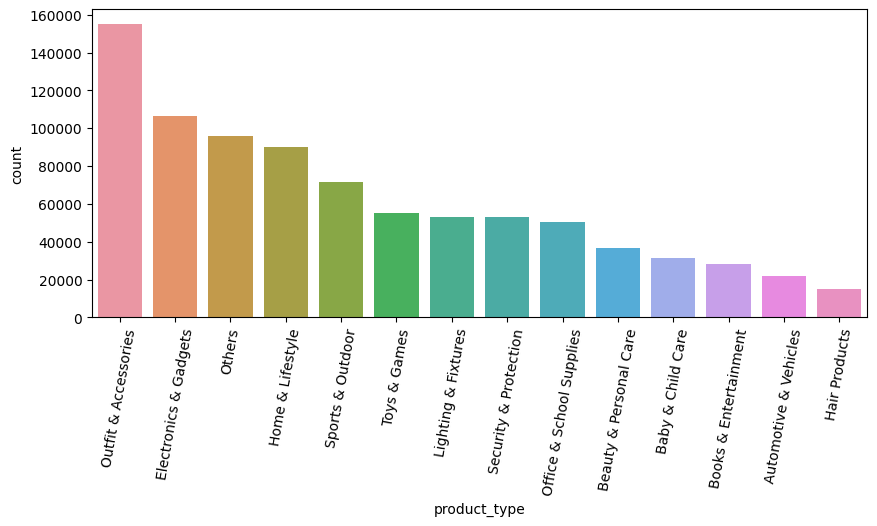

In [14]:
plt.figure(figsize=(10, 4))
sns.countplot(data=exp, x='product_type', order=exp['product_type'].value_counts().index)

plt.xticks(rotation=80)
plt.show()

#clean the sold column from objects and transform the dtype into **int**

In [15]:
exp.sold = exp.sold.str.replace(' sold', '')

In [16]:
exp.sold.astype(int)

0         1487
1         5348
2            1
3         2979
4         2103
          ... 
864265       1
864266       2
864267      18
864268       0
864269       0
Name: sold, Length: 864234, dtype: int64

# clean the shipping cost column from objects and transform it into **float**

In [17]:
exp.shippingCost[exp.shippingCost == 'None'] = 0

<ipython-input-17-b5030a621307>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp.shippingCost[exp.shippingCost == 'None'] = 0


In [18]:
exp['shippingCost'] = exp.shippingCost.astype(float).round(2)

# Transform the dtype of lunch time column into date time

In [19]:
exp['lunchTime'] = pd.to_datetime(exp['lunchTime'])

In [20]:
exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864234 entries, 0 to 864269
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             864234 non-null  int64         
 1   storeName      864234 non-null  object        
 2   title          864234 non-null  object        
 3   rating         864234 non-null  float64       
 4   lunchTime      864234 non-null  datetime64[ns]
 5   sold           864234 non-null  object        
 6   price          864234 non-null  float64       
 7   discount       864234 non-null  int64         
 8   shippingCost   864234 non-null  float64       
 9   imageUrl       864234 non-null  object        
 10  category_name  864234 non-null  object        
 11  product_type   864234 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 85.7+ MB


In [21]:
exp.describe()

,id,rating,price,discount,shippingCost
count,8.642340e+05,864234.000000,864234.000000,864234.000000,8.642340e+05
mean,9.080584e+14,2.272724,221.443884,30.898693,8.404745e+01
std,2.963901e+14,2.404218,2297.733801,19.992883,5.914286e+03
min,1.008900e+04,0.000000,0.010000,0.000000,0.000000e+00
25%,1.005003e+15,0.000000,13.940000,15.000000,0.000000e+00
50%,1.005004e+15,0.000000,38.340000,32.000000,1.123000e+01
75%,1.005005e+15,5.000000,110.640000,48.000000,2.031000e+01
max,1.010000e+15,5.000000,976428.200000,99.000000,2.896137e+06


# Create new columns {month name, day name, final cost , customer saving}

In [22]:
exp['month_name'] = exp['lunchTime'].dt.month_name()
exp['day_name'] = exp['lunchTime'].dt.day_name()
exp['year'] = exp['lunchTime'].dt.year

In [23]:
exp['sold'] = exp['sold'].astype(int)
exp['price'] = exp['price'].astype(float)
exp['discount'] = exp['discount'].astype(float)
exp['shippingCost'] = exp['shippingCost'].astype(float)



exp['final_cost'] = exp['price'] * (1 - exp['discount'] / 100) + exp['shippingCost']

exp['customer_saving'] = exp['price'] - (exp['price'] * (1 - exp['discount'] / 100))

In [24]:
exp.drop('lunchTime' , axis = 1 ,inplace = True)

In [25]:
exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864234 entries, 0 to 864269
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               864234 non-null  int64  
 1   storeName        864234 non-null  object 
 2   title            864234 non-null  object 
 3   rating           864234 non-null  float64
 4   sold             864234 non-null  int64  
 5   price            864234 non-null  float64
 6   discount         864234 non-null  float64
 7   shippingCost     864234 non-null  float64
 8   imageUrl         864234 non-null  object 
 9   category_name    864234 non-null  object 
 10  product_type     864234 non-null  object 
 11  month_name       864234 non-null  object 
 12  day_name         864234 non-null  object 
 13  year             864234 non-null  int64  
 14  final_cost       864234 non-null  float64
 15  customer_saving  864234 non-null  float64
dtypes: float64(6), int64(3), object(7)
mem

In [26]:
exp.iloc[:, 5:10]

,price,discount,shippingCost,imageUrl,category_name
0,464.16,76.0,0.00,//ae01.alicdn.com/kf/S29307438fb224285b2981d71...,home-appliances
1,22.28,54.0,0.00,//ae01.alicdn.com/kf/S8d4807ce10bd4152850ec872...,home-appliances
2,251.76,25.0,0.00,//ae01.alicdn.com/kf/Sdae1fa83cf1a482397b6e061...,home-appliances
3,8.95,84.0,0.00,//ae01.alicdn.com/kf/Se200f7a404974c87b5941587...,home-appliances
4,775.35,59.0,0.00,//ae01.alicdn.com/kf/Scfe6fa94f0644aaabff79c0f...,home-appliances
...,...,...,...,...,...
864265,68.07,20.0,71.18,//ae01.alicdn.com/kf/S30eacf3e0f834c18a69003a5...,consumer-electronics
864266,4.48,51.0,0.00,//ae01.alicdn.com/kf/Sb70f27a7c4ce44e5bb7150e0...,consumer-electronics
864267,84.87,22.0,81.66,//ae01.alicdn.com/kf/S7a6ecce2e99b4a0186895d82...,consumer-electronics
864268,14.94,10.0,9.03,//ae01.alicdn.com/kf/S5395dd9f321e48d282c128f3...,consumer-electronics


In [27]:
exp.head()

,id,storeName,title,rating,sold,price,discount,shippingCost,imageUrl,category_name,product_type,month_name,day_name,year,final_cost,customer_saving
0,1005002508947205,IDEACH Official Store,Wireless Handheld Vacuum Cleaner 10kPa 150W Po...,4.8,1487,464.16,76.0,0.0,//ae01.alicdn.com/kf/S29307438fb224285b2981d71...,home-appliances,Home & Lifestyle,April,Monday,2021,111.3984,352.7616
1,1005004546160959,Factory Direct Collected Store,Portable Water Drop Humidifier USB Desktop Ind...,4.8,5348,22.28,54.0,0.0,//ae01.alicdn.com/kf/S8d4807ce10bd4152850ec872...,home-appliances,Home & Lifestyle,July,Tuesday,2022,10.2488,12.0312
2,1005004967489874,HOMDD Specialty Store,Portable Desktop Instant Automatic Multi-Speed...,0.0,1,251.76,25.0,0.0,//ae01.alicdn.com/kf/Sdae1fa83cf1a482397b6e061...,home-appliances,Home & Lifestyle,November,Thursday,2022,188.8200,62.9400
3,1005003601452827,XINGHUO ONLINE Store,Portable 420ml Air Humidifier Aroma Oil Humidi...,4.7,2979,8.95,84.0,0.0,//ae01.alicdn.com/kf/Se200f7a404974c87b5941587...,home-appliances,Home & Lifestyle,November,Wednesday,2021,1.4320,7.5180
4,33022569739,ABIR Official Store,ABIR X6 Robot Vacuum Cleaner Visual Navigatio...,4.7,2103,775.35,59.0,0.0,//ae01.alicdn.com/kf/Scfe6fa94f0644aaabff79c0f...,home-appliances,Home & Lifestyle,May,Friday,2019,317.8935,457.4565


In [28]:
exp.describe()

,id,rating,sold,price,discount,shippingCost,year,final_cost,customer_saving
count,8.642340e+05,864234.000000,864234.000000,864234.000000,864234.000000,8.642340e+05,864234.000000,8.642340e+05,864234.000000
mean,9.080584e+14,2.272724,81.910624,221.443884,30.898693,8.404745e+01,2021.348285,2.626207e+02,42.870624
std,2.963901e+14,2.404218,808.144964,2297.733801,19.992883,5.914286e+03,1.209383,6.486578e+03,199.332519
min,1.008900e+04,0.000000,0.000000,0.010000,0.000000,0.000000e+00,2008.000000,4.000000e-04,0.000000
25%,1.005003e+15,0.000000,0.000000,13.940000,15.000000,0.000000e+00,2021.000000,1.946007e+01,1.716000
50%,1.005004e+15,0.000000,3.000000,38.340000,32.000000,1.123000e+01,2022.000000,3.718000e+01,7.794600
75%,1.005005e+15,5.000000,19.000000,110.640000,48.000000,2.031000e+01,2022.000000,1.007300e+02,26.870400
max,1.010000e+15,5.000000,121131.000000,976428.200000,99.000000,2.896137e+06,2022.000000,2.928813e+06,24910.016000


# To see images links....

In [29]:
exp.loc[exp['price'] > 50000, ['imageUrl','price','product_type','title','category_name']].sort_values(by = 'price').values

array([['//ae01.alicdn.com/kf/Sf9c09737278345ff9045064dc3aa0e18h/L7-Computer-Server-Antminer-L7-9500m-3425W-9050m-Bitmain-Dogecoin-LTC-Mining-Master-9300m-8800m-8550m.jpg_220x220xz.jpg',
        50193.04, 'Electronics & Gadgets',
        'L7 Computer Server Antminer L7 9500m 3425W 9050m Bitmain Dogecoin/LTC Mining Master 9300m/8800m/8550m Power Supply Included',
        'servers'],
       ['//ae01.alicdn.com/kf/Sf9c09737278345ff9045064dc3aa0e18h/L7-Computer-Server-Antminer-L7-9500m-3425W-9050m-Bitmain-Dogecoin-LTC-Mining-Master-9300m-8800m-8550m.jpg_220x220xz.jpg',
        50193.04, 'Electronics & Gadgets',
        'L7 Computer Server Antminer L7 9500m 3425W 9050m Bitmain Dogecoin/LTC Mining Master 9300m/8800m/8550m Power Supply Included',
        'servers'],
       ['//ae01.alicdn.com/kf/S053172e6ebd448938d9ee41a17755892o/ZONESUN-ZS-XYZ4-Liquid-Filling-Machine-4-Heads-Ceramic-Plunger-Pump-Vial-Tube-Chemical-Agents-Medical.jpg_220x220xz.jpg',
        50393.67, 'Others',
        'ZONESU

In [30]:
print(exp.imageUrl[exp.category_name.str.contains('hik')].head(1).values)

['//ae01.alicdn.com/kf/S59da73f8f1fb436e90c034ba9c841bac2/Grill-Rack-Foldable-Yamagata-Grill-Net-Portable-Outdoor-Camping-Accessories-For-Grilling-Bread-Meat-Sausage-Fish.jpg_220x220xz.jpg']


In [31]:
keywords = ['nature', 'hike', 'sleeping', 'bag' , '4' ,'season']
exp_filtered = exp[exp.title.str.contains('|'.join(keywords), case=False, regex=True)]
exp_filtered.imageUrl[exp_filtered.title.apply(lambda x: all(keyword in x.lower() for keyword in keywords))].values

array(['//ae01.alicdn.com/kf/Sa9cebd4f97f1495fa5d1cf2101854e66J/Naturehike-Camping-Sleeping-Bag-Lightweight-4-Season-Warm-Cold-Envelope-Backpacking-Sleeping-Bag-for-Outdoor-Traveling.jpg_220x220xz.jpg'],
      dtype=object)

# Checking null values


In [32]:
exp.isna().sum()

id                 0
storeName          0
title              0
rating             0
sold               0
price              0
discount           0
shippingCost       0
imageUrl           0
category_name      0
product_type       0
month_name         0
day_name           0
year               0
final_cost         0
customer_saving    0
dtype: int64

# drop the duplicates

In [33]:
exp.duplicated().sum()

153723

In [34]:
exp = exp.drop_duplicates()

In [35]:
exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 710511 entries, 0 to 864269
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               710511 non-null  int64  
 1   storeName        710511 non-null  object 
 2   title            710511 non-null  object 
 3   rating           710511 non-null  float64
 4   sold             710511 non-null  int64  
 5   price            710511 non-null  float64
 6   discount         710511 non-null  float64
 7   shippingCost     710511 non-null  float64
 8   imageUrl         710511 non-null  object 
 9   category_name    710511 non-null  object 
 10  product_type     710511 non-null  object 
 11  month_name       710511 non-null  object 
 12  day_name         710511 non-null  object 
 13  year             710511 non-null  int64  
 14  final_cost       710511 non-null  float64
 15  customer_saving  710511 non-null  float64
dtypes: float64(6), int64(3), object(7)
mem

# Outliers

In [36]:
outliers = detect_outliers(exp, 0 , ['price'])
len(outliers)

96876

In [37]:
outliers = detect_outliers(exp, 0 , ['discount'])
len(outliers)

104

In [38]:
exp['discount'][exp['discount']>97].count()

77

In [39]:
num_col = exp.select_dtypes(include = np.number).columns
num_col

Index(['id', 'rating', 'sold', 'price', 'discount', 'shippingCost', 'year',
       'final_cost', 'customer_saving'],
      dtype='object')

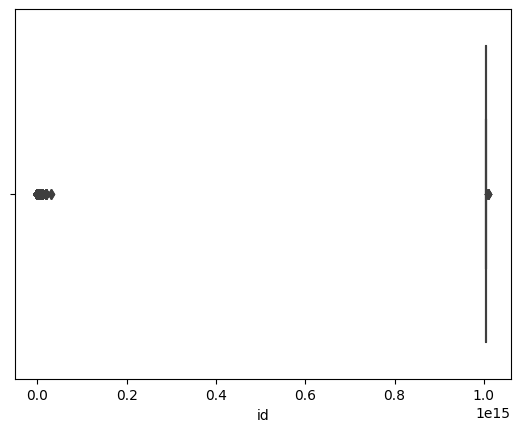

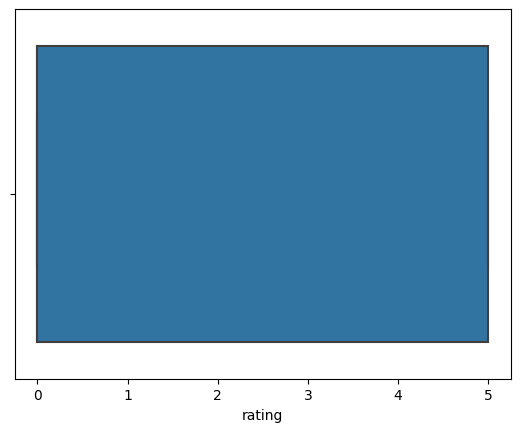

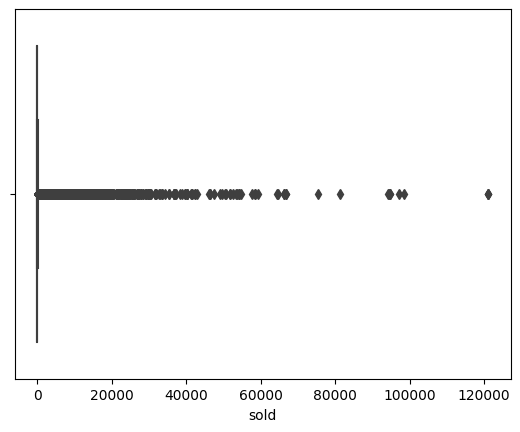

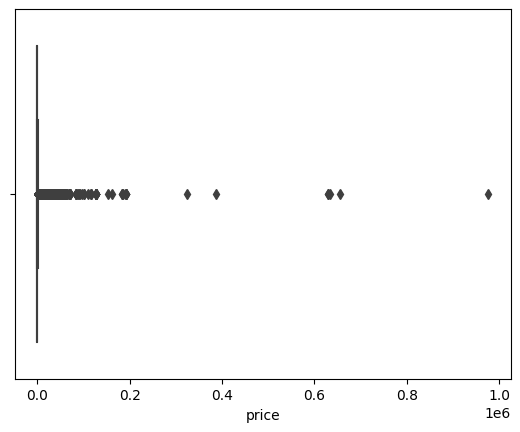

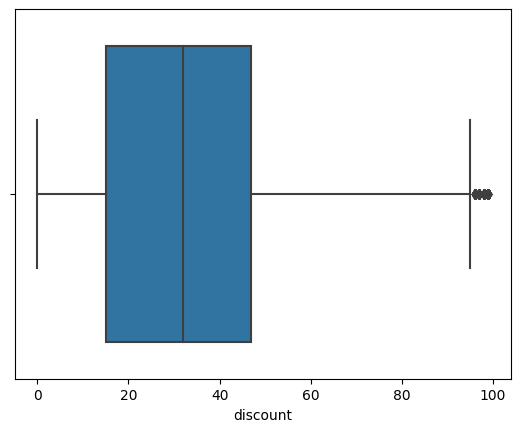

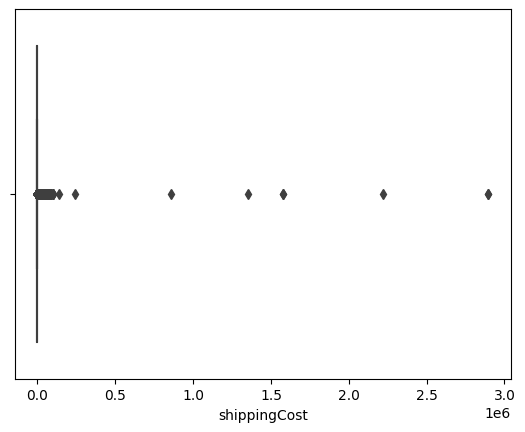

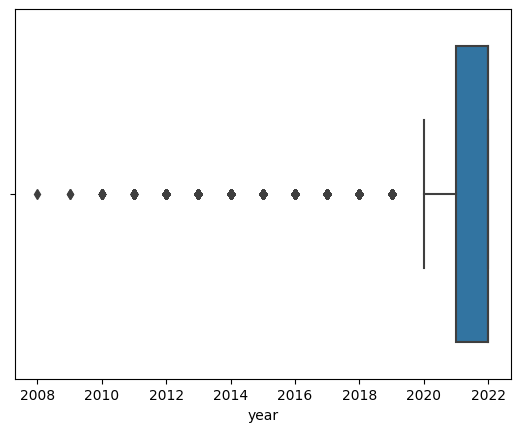

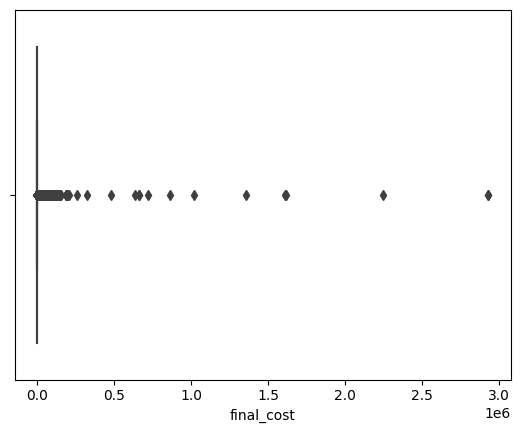

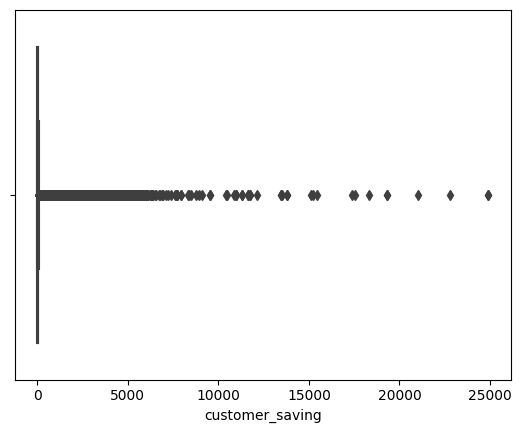

In [40]:
for col in num_col:
  sns.boxplot(data= exp , x = col)
  plt.show()

# Download the updated dataset

In [41]:
exp.to_csv('Ali_express_dataset.csv' , index = False)

# updated dataframe  

In [42]:
exp.head(2)

,id,storeName,title,rating,sold,price,discount,shippingCost,imageUrl,category_name,product_type,month_name,day_name,year,final_cost,customer_saving
0,1005002508947205,IDEACH Official Store,Wireless Handheld Vacuum Cleaner 10kPa 150W Po...,4.8,1487,464.16,76.0,0.0,//ae01.alicdn.com/kf/S29307438fb224285b2981d71...,home-appliances,Home & Lifestyle,April,Monday,2021,111.3984,352.7616
1,1005004546160959,Factory Direct Collected Store,Portable Water Drop Humidifier USB Desktop Ind...,4.8,5348,22.28,54.0,0.0,//ae01.alicdn.com/kf/S8d4807ce10bd4152850ec872...,home-appliances,Home & Lifestyle,July,Tuesday,2022,10.2488,12.0312


In [43]:
exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 710511 entries, 0 to 864269
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               710511 non-null  int64  
 1   storeName        710511 non-null  object 
 2   title            710511 non-null  object 
 3   rating           710511 non-null  float64
 4   sold             710511 non-null  int64  
 5   price            710511 non-null  float64
 6   discount         710511 non-null  float64
 7   shippingCost     710511 non-null  float64
 8   imageUrl         710511 non-null  object 
 9   category_name    710511 non-null  object 
 10  product_type     710511 non-null  object 
 11  month_name       710511 non-null  object 
 12  day_name         710511 non-null  object 
 13  year             710511 non-null  int64  
 14  final_cost       710511 non-null  float64
 15  customer_saving  710511 non-null  float64
dtypes: float64(6), int64(3), object(7)
mem

# Questions

### 1. What are the top 10 stores with the highest ratings?

In [44]:
store_ratings = exp.groupby('storeName')['rating'].mean().nlargest(10)

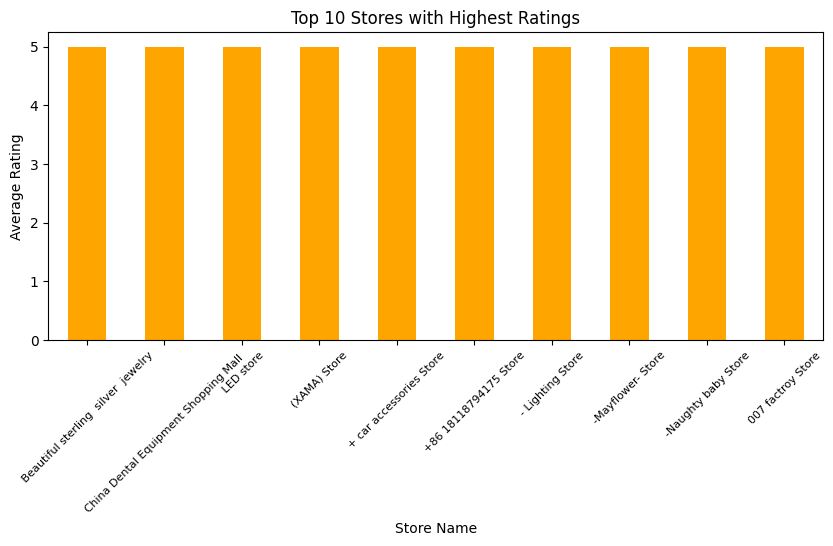

In [45]:
plt.figure(figsize=(10, 4))
store_ratings.plot(kind='bar',color = 'orange')
plt.title('Top 10 Stores with Highest Ratings')
plt.xlabel('Store Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45 , fontsize=8)
plt.show()

### 2. Which stores offer the highest discounts on their products?

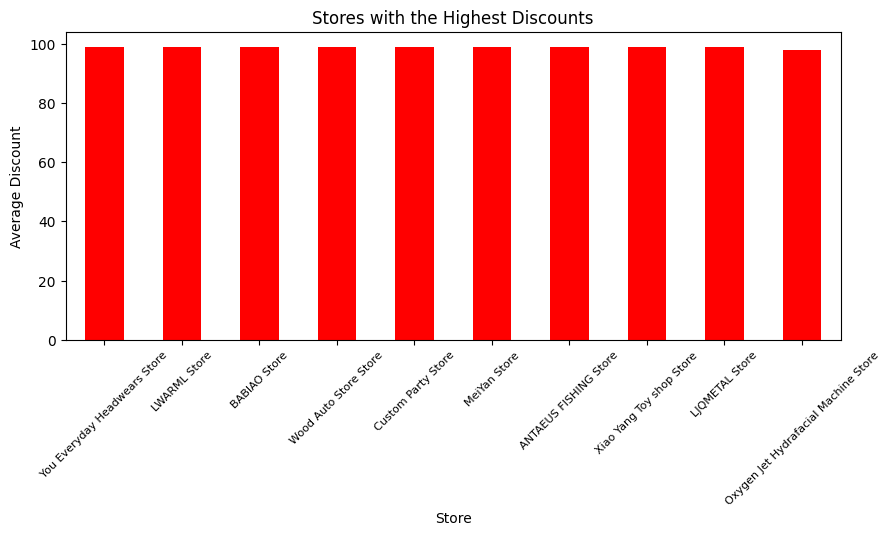

In [46]:
store_discounts = exp.groupby('storeName')['discount'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 4))
store_discounts.plot(kind='bar' , color = 'red')
plt.title('Stores with the Highest Discounts')
plt.xlabel('Store')
plt.ylabel('Average Discount')
plt.xticks(rotation=45 , fontsize=8)
plt.show()

### 3. Which category has the highest average discount?


In [47]:
category_discount = exp.groupby('category_name')['discount'].mean().sort_values(ascending=False).head(10)

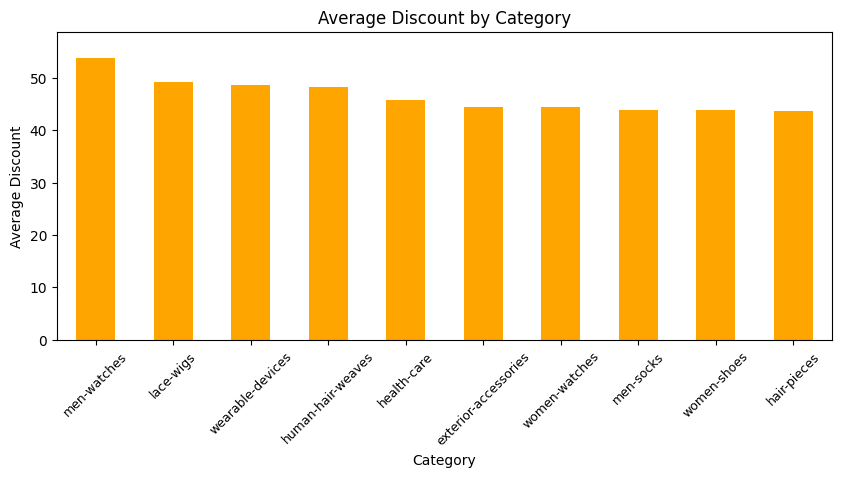

In [48]:
plt.figure(figsize=(10, 4))
category_discount.plot(kind='bar',color='orange')
plt.title('Average Discount by Category')
plt.xlabel('Category')
plt.ylabel('Average Discount')
plt.xticks(rotation=45, fontsize=9)
plt.ylim(0, category_discount.max() + 5)
plt.show()

### 4. Which product type has the highest average discount?

In [49]:
type_discount = exp.groupby('product_type')['discount'].mean().sort_values(ascending=False).head(10)

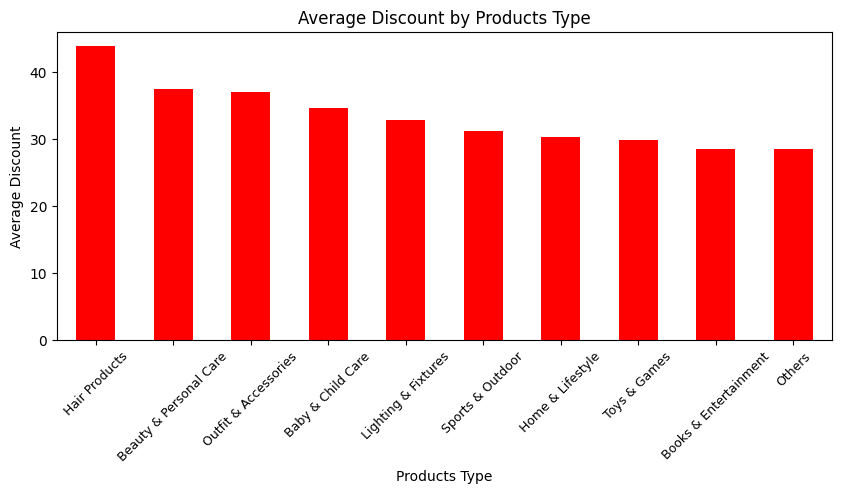

In [50]:
plt.figure(figsize=(10, 4))
type_discount.plot(kind='bar', color = 'red')
plt.title('Average Discount by Products Type')
plt.xlabel('Products Type')
plt.ylabel('Average Discount')
plt.xticks(rotation=45, fontsize=9)
plt.show()

### 5. What is the average price of items in each product type?

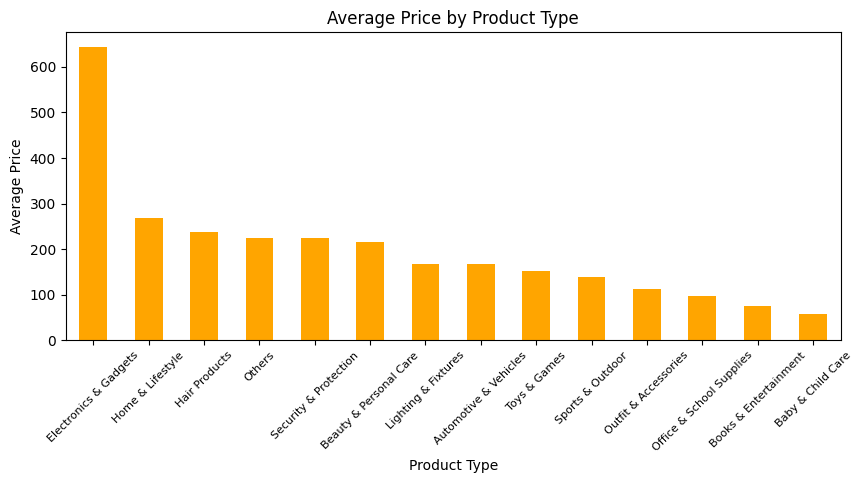

In [51]:
category_avg_price = exp.groupby('product_type')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 4))
category_avg_price.plot(kind='bar', color = 'orange')
plt.title('Average Price by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45, fontsize=8)
plt.show()

### 6. How many products are sold in each product type?

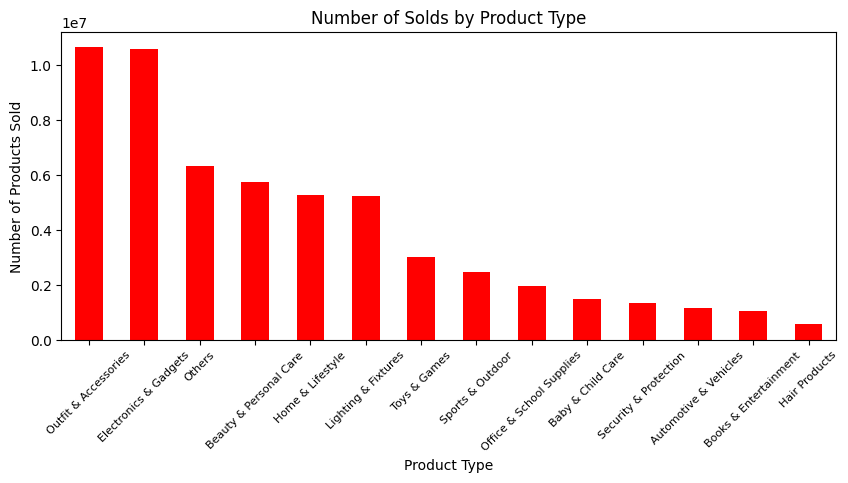

In [52]:
products_sold = exp.groupby('product_type')['sold'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 4))
products_sold.plot(kind='bar', color = 'red')
plt.title('Number of Solds by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Number of Products Sold')
plt.xticks(rotation=45,fontsize=8)
plt.show()

### 7. What is the average shipping cost for items in each product type?

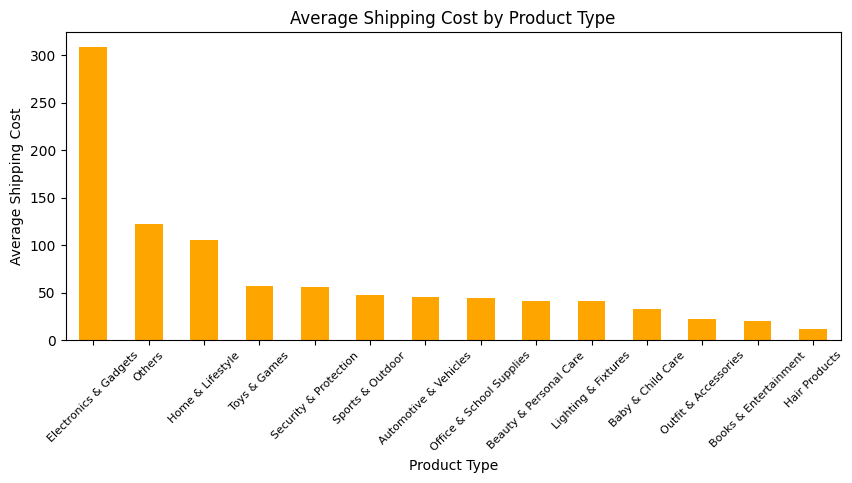

In [53]:
category_avg_shipping_cost = exp.groupby('product_type')['shippingCost'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 4))
category_avg_shipping_cost.plot(kind='bar' , color = 'orange')
plt.title('Average Shipping Cost by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Average Shipping Cost')
plt.xticks(rotation=45, fontsize=8)
plt.show()

### 8. What are the top 10 stores with the highest solds?

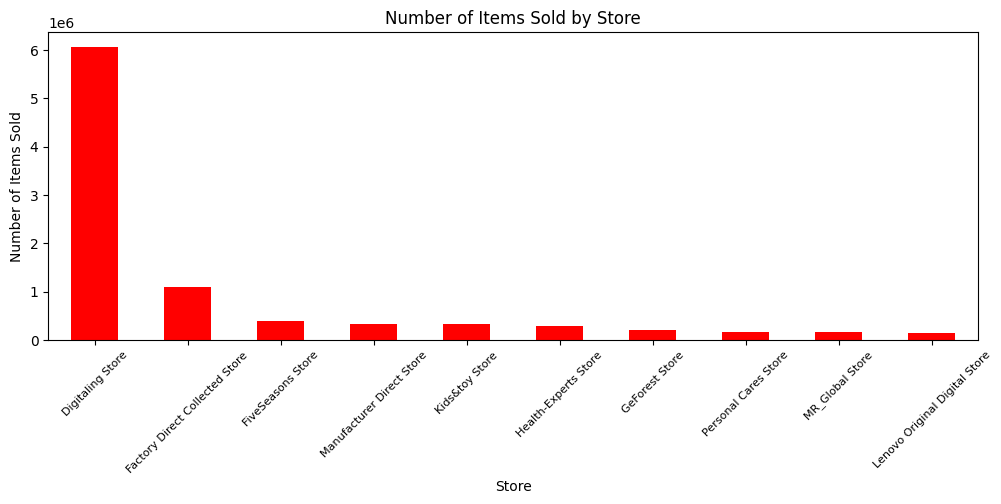

In [54]:
items_sold = exp.groupby('storeName')['sold'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 4))
items_sold.plot(kind='bar', color = 'red')
plt.title('Number of Items Sold by Store')
plt.xlabel('Store')
plt.ylabel('Number of Items Sold')
plt.xticks(rotation=45, fontsize=8)
plt.show()

### 9.Monthly sales for the products

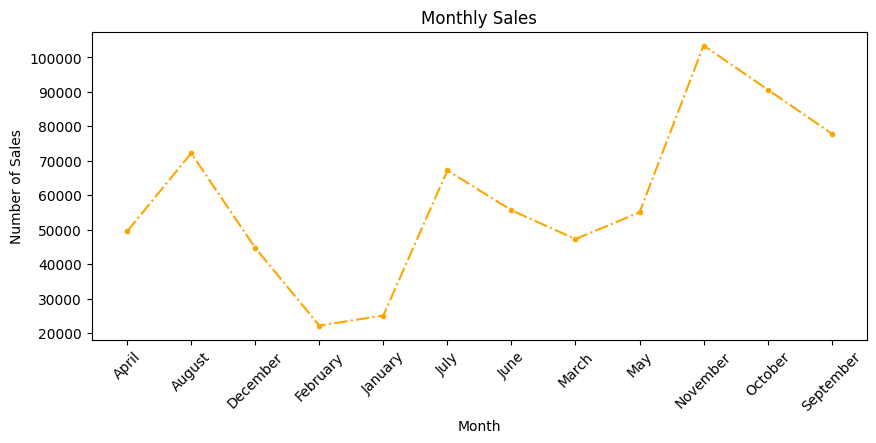

In [55]:
monthly_sales = exp.groupby('month_name').size()

plt.figure(figsize=(10, 4))
plt.plot(monthly_sales.index, monthly_sales.values,  color = 'orange' , marker='.', linestyle='-.')

plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Number of Sales')

plt.xticks(rotation=45)

plt.show()

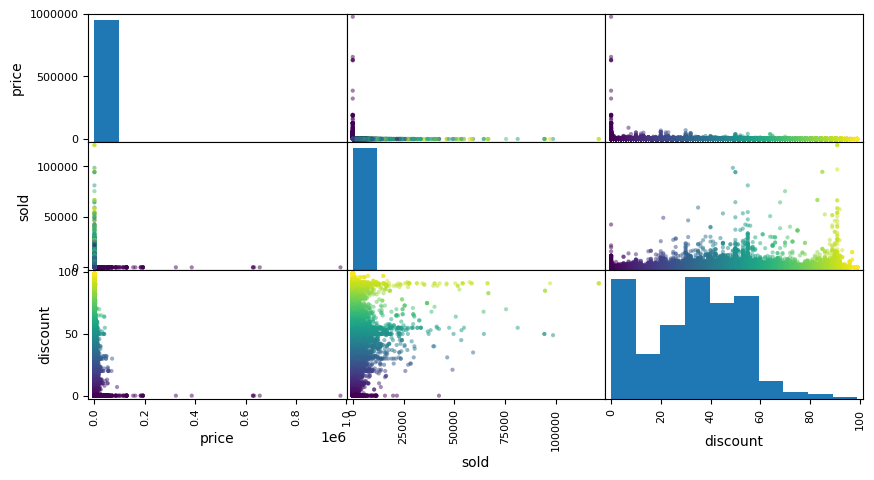

In [56]:
import matplotlib.cm as cm

scatter_matrix = pd.plotting.scatter_matrix(exp[['price', 'sold', 'discount']], figsize=(10, 5), c=exp['discount'], cmap=cm.viridis)
plt.show()

# Recommedations Prediction

In [57]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Filtered data
filtered_data = exp

# Define the columns for one-hot encoding and TF-IDF transformation
categorical_cols = ['title']
categorical_cols2 = ['category_name']
categorical_cols3 = ['product_type']
numerical_col = ['customer_saving']




# Create the column transformer
preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(), categorical_cols),
    ('onehot2', OneHotEncoder(), categorical_cols2),
    ('onehot3', OneHotEncoder(), categorical_cols3),
    ('scaling', StandardScaler(), numerical_col)
])

filtered_data['customer_saving'] = filtered_data['customer_saving'].astype(str)
# Transform the input features
X = preprocessor.fit_transform(filtered_data)

# Create the k-nearest neighbors classifier
knn = KNeighborsClassifier(n_neighbors=5, metric='cosine')

# Fit the classifier to the transformed data
knn.fit(X, filtered_data['id'])

# Define the function to get item recommendations
def get_item_recommendations(item_id, top_n=5):
    # Reshape the item features
    item_features = preprocessor.transform(filtered_data.loc[[item_id]])

    # Find the nearest neighbors
    distances, neighbor_indices = knn.kneighbors(item_features)

    # Get the recommended item IDs
    recommendations = filtered_data.iloc[neighbor_indices[0]].index.tolist()

    return recommendations[:top_n]
item_id = 225363  # ID of the item for which you want recommendations
top_recommendations = get_item_recommendations(item_id, top_n=5)

# Print the recommended item IDs
print("Top recommendations for item", item_id)
print(top_recommendations)

Top recommendations for item 225363
[225363, 440408, 440393, 440187, 440284]


In [58]:
exp.loc[item_id, ['rating','title' , 'category_name','product_type','customer_saving']]

rating                                                           4.0
title              Brand Denim Jacket Men Autumn Blazer Jacket Sl...
category_name                                          suits-blazers
product_type                                    Outfit & Accessories
customer_saving                                             100.9415
Name: 225363, dtype: object

In [59]:
exp.loc[top_recommendations, ['rating', 'title', 'category_name', 'product_type','discount', 'price','customer_saving']]

,rating,title,category_name,product_type,discount,price,customer_saving
225363,4.0,Brand Denim Jacket Men Autumn Blazer Jacket Sl...,suits-blazers,Outfit & Accessories,55.0,183.53,100.9415
440408,5.0,Handsome Terno Masculino Slim Fit Check Plaid ...,suits-blazers,Outfit & Accessories,36.0,360.50,129.78
440393,5.0,Fashion White Jacquard Pattern Slim Fit Men Su...,suits-blazers,Outfit & Accessories,35.0,371.39,129.98649999999998
440187,5.0,Fashion Navy Blue With Gold Jacquard Wedding S...,suits-blazers,Outfit & Accessories,35.0,371.39,129.98649999999998
440284,0.0,Fashion White Jacquard Men Suit 3 Pieces Set R...,suits-blazers,Outfit & Accessories,35.0,371.39,129.98649999999998


In [60]:
keywords = ['jacket','men','xxl']
exp_filtered = exp[exp.title.str.contains('|'.join(keywords), case=False, regex=True)]
exp_filtered.imageUrl[exp_filtered.title.apply(lambda x: all(keyword in x.lower() for keyword in keywords))]

225363    //ae01.alicdn.com/kf/HTB1ut1bRrrpK1RjSZTEq6AWA...
225971    //ae01.alicdn.com/kf/Hf00c2fb216e54c77a76ab630...
440073    //ae01.alicdn.com/kf/S80d78db20d2f42e39f2f839f...
669354    //ae01.alicdn.com/kf/Sfbba6c6f6ca7481cb2b03ec8...
Name: imageUrl, dtype: object